In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

#for differnt color (may be it is something new I don't know)
color = sns.color_palette()
sns.set_style('darkgrid')
#print('Packages for Mathematical Computation and visualization imported!')


'''statistical packages'''
from scipy import stats
from scipy.stats import norm, skew
#from scipy.special import boxcox1p
#from sxipy.stats.stats import pearsonr
#print('Statistical packages imported!')

# Importing Algorithm model packages

In [2]:
#sklearn linear models -->ElasticNEt, Lasso, BayesianRidge, lassolarsIC
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

#sklearn ensemble models
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor

# estimator
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.kernel_ridge import KernelRidge
'''
Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) 
with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. 
For non-linear kernels, 
this corresponds to a non-linear function in the original space
'''
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb


# PIPELINE AND SCALING PREPROCESSING
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# MODEL SELECTION PACKAGES USED FOR SAMPLING DATASET AND OPTIMISING PARAMETERS
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

#importing dataset

In [3]:
train = pd.read_csv('price_data_tr.csv')
val = pd.read_csv('price_data_val.csv')
test = pd.read_csv('price_data_ts.csv')

In [4]:
pd.set_option('display.max_columns', None)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1310440590,20150413T000000,440000.0,3,2.50,2290,6302,2.0,0,0,3,9,2290,0,1997,0,98058,47.4350,-122.107,2700,7500
1,1437580480,20140918T000000,994000.0,5,3.25,4260,7861,2.0,0,0,3,10,4260,0,2005,0,98074,47.6110,-121.992,4020,7528
2,7617500075,20140721T000000,427000.0,3,1.75,2000,7111,1.0,0,0,4,7,1360,640,1956,0,98177,47.7676,-122.373,1830,9000
3,8122100130,20140618T000000,415000.0,3,1.75,1270,4800,1.0,0,0,3,7,1270,0,1952,2014,98126,47.5362,-122.376,1220,4800
4,4476400275,20150114T000000,335000.0,3,1.75,2100,8298,1.0,0,0,4,7,1230,870,1952,0,98166,47.4601,-122.360,1700,10830


In [5]:
# KEEPING A COPY OF TRAIN AND TEST DB FOR FURTHER USAGE
rawTrain = train.copy()
rawTest = test.copy()
rawVal = val.copy()

In [6]:
train.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1310440590,20150413T000000,440000.0,3,2.50,2290,6302,2.0,0,0,3,9,2290,0,1997,0,98058,47.4350,-122.107,2700,7500
1,1437580480,20140918T000000,994000.0,5,3.25,4260,7861,2.0,0,0,3,10,4260,0,2005,0,98074,47.6110,-121.992,4020,7528
2,7617500075,20140721T000000,427000.0,3,1.75,2000,7111,1.0,0,0,4,7,1360,640,1956,0,98177,47.7676,-122.373,1830,9000


In [7]:

# STORING NUMBER OF ROWS AND COLUMNS IN LISTS
train_shape_list=[]
test_shape_list=[]
val_shape_list = []
train_shape_list.append(train.shape)
test_shape_list.append(test.shape)
val_shape_list.append(val.shape)

# SAVING ID COLUMNS
train_ID = train['id']
test_ID = test['id']
val_ID = val['id']

train = train.drop(['id', 'date'], axis=1)
val = val.drop(['id', 'date'], axis=1)
test = test.drop(['id','date'], axis=1)

#val_x_col = list(val.columns)   # make a list of columns
#val_x_col.remove('price')
#val_y_col = ['price']

#val_x_col, val_y_col

'''
# DROPPING ID COLUMNS FROM DATASETS
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)
'''

'''
# MAKING A SERIES TO SHOW WHETHER ID IS REMOVED OR NOT
id_removal = pd.Series(['before', 'after'])

# STORING SHAPES OF DATASETS AFTER REMOVING ID
train_shape_list.append(train.shape)
test_shape_list.append(test.shape)

# MAKING A DATA-FRAME TO REPRESENT STATUS
data_size_check = pd.DataFrame(
    {'trainDB': train_shape_list,
     'testDB': test_shape_list,
     'ID removal': id_removal
    })
'''

# MAKING A COPY OF DATASETS
trainNoId = train.copy()
testNoId = test.copy()
valNoId = val.copy

finding unique values

Number of Neumeric Columns =  19


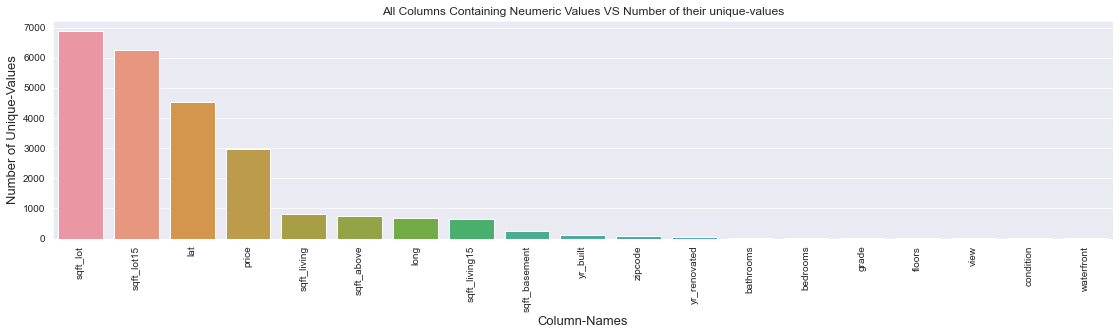

In [8]:
# SEPARATING NUMERIC COLUMNS
numeric_columns = train.select_dtypes(exclude=['object']).columns.values.tolist()
#print(numeric_columns)
print('Number of Neumeric Columns = ',len(numeric_columns))
unique_values=[]
for item in numeric_columns: 
    unique_values.append(train[item].nunique())
numeric_column_list = list(zip(numeric_columns, unique_values))
#(numeric_column_list)
numeric_column_list = sorted(numeric_column_list,key=lambda l:l[1], reverse=True)
numeric_column_list=pd.DataFrame(numeric_column_list, columns=['Column-Names', 'Unique-Values'])
                                                  
                                                  # PLOTTING NUMBER OF UNIQUE-VALUES FOR EACH NUMERIC COLUMNS
plt.subplots(figsize=(19, 4))
sns.barplot(x=numeric_column_list['Column-Names'], y=numeric_column_list['Unique-Values'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('All Columns Containing Neumeric Values VS Number of their unique-values')
plt.show()


In [9]:
len(np.unique(train['yr_renovated']))

67


It is more certain to find outliers in the neumeric-columns with large number of unique values. Also the existance of outliers in such columns that are highly correlated to target-variable may result in lower accuracy of prediction. So lets select the first 11 features having the largest number of unique-values (upto zipcode) and Find their corrilation with SalesPrice.

# checking correlation

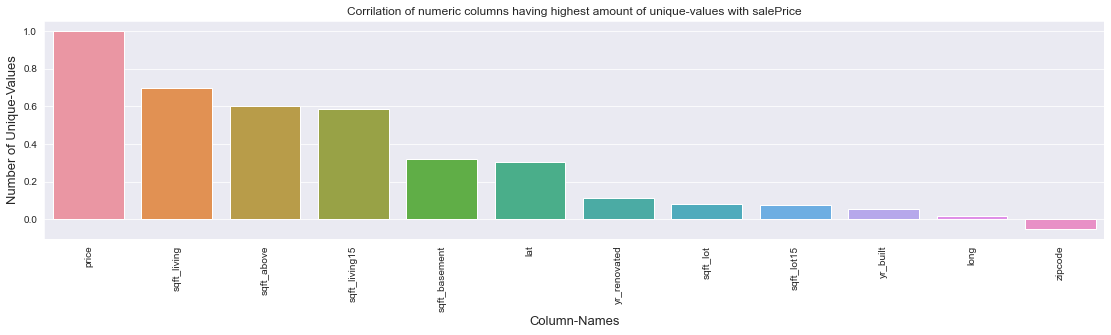

In [10]:
# CHECKING CORRELATION OF THE SELECTED COLUMNS WITH SALEPRICE
highly_unique_columns = numeric_column_list.drop(numeric_column_list[numeric_column_list['Unique-Values'] < 65].index)
#droping columns with unique values less than 65

cols = highly_unique_columns['Column-Names']
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['price'])))    # .corr is for finding correlation coefficient
    
    '''
    Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
    Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
    '''
    
# MAKING A DATAFRAME TO STORE THE CORRELATIONS     
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)

# VISUALIZING CORRELATIONS GRAPHICALLY
plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('Corrilation of numeric columns having highest amount of unique-values with salePrice')
plt.show()

Most of the columns have maintatined good correlation except the last few

# looking for outliers

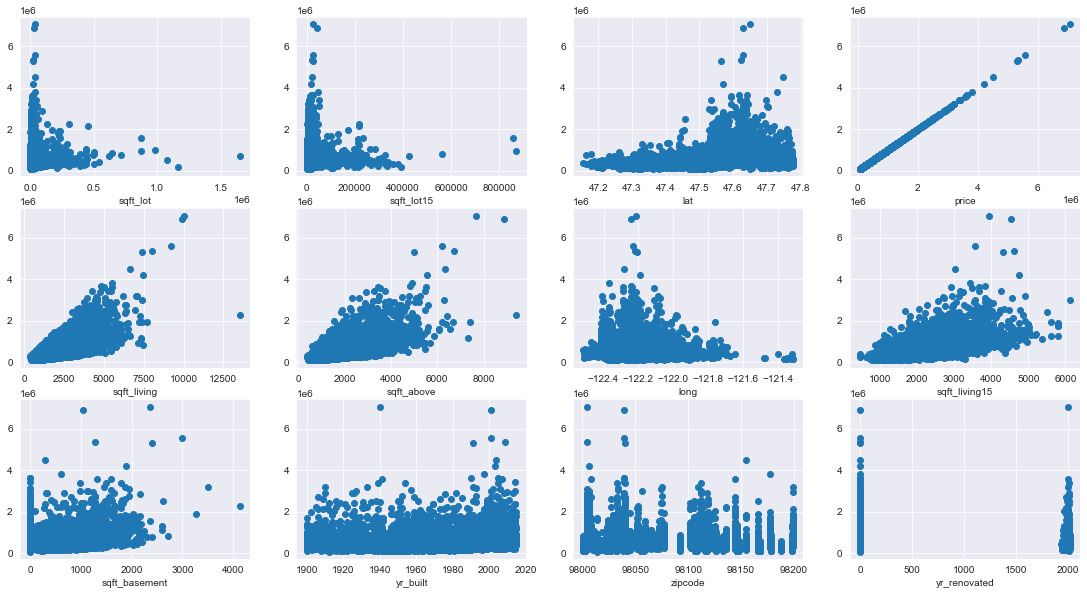

In [11]:
# a function to show relation with sales price
def relation_wid_price(c, column):
    plt.subplot(5, 4, c)
    plt.scatter(x=train[column], y=train['price'])
    plt.xlabel(column)
c=1
plt.subplots(figsize=(19, 17))
for item in cols:
    relation_wid_price(c, item)
    c = c+1
plt.show()

4.4: Removal
Now we have selected the columns containing outliers and ready to remove them.

In [12]:
# creating a function to remove outliers
def outlier_check_plot(column):
    plt.subplots(figsize=(19, 5))
    plt.subplot(1,3,1)
    plt.scatter(x=train[column].sort_values(ascending=False)[:12], y=train_ID[:12], color='red', label='train')
    plt.scatter(x=test[column].sort_values(ascending=False)[:12], y=test_ID[:12], label='test')
    plt.scatter(x=val[column].sort_values(ascending=False)[:12], y=val_ID[:12], label='val')
    plt.ylabel('Serial Number', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.title('Fig 1: 12 highest-values of category {} \n in both train and test dataset'.format(column))
    plt.legend(loc='center',fontsize=13)
    
    # disribution plot od the column
    plt.subplot(1,3,2)
    sns.distplot(train[column], color='red', rug=True, hist=False, label='Train')
    sns.distplot(val[column], color='blue', rug=True, hist=False, label='val')
    sns.distplot(test[column], color='green', rug=True, hist=False, label='test')
    plt.ylabel('Distrubutuin', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('fig2 :Distribution-plot of category {} \n for both train and test dataset'.format(column))
    plt.legend(fontsize=13)
    
    # SCATTER-PLOT OF THE COLUMN WITH RESPECT TO SALEPRICE 
    plt.subplot(1, 3, 3)
    plt.scatter(x = train[column], y = train['price'])
    plt.ylabel('price', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 3: Scatter-plot of train-category {} \n with respect to Price'.format(column))
    plt.show()


Removing Outliers is good if there is no or few outliers in test-dataset. Therefore for each column we have checked whether there is any outlier-type data in the testset (left) and then compared the distribution of data for both train and test set to figure out whether they look similar or not (middle). Then finally we checked the saleprice for outlier-values (right)

Before outlier-removal of sqdt_lot: 


c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users

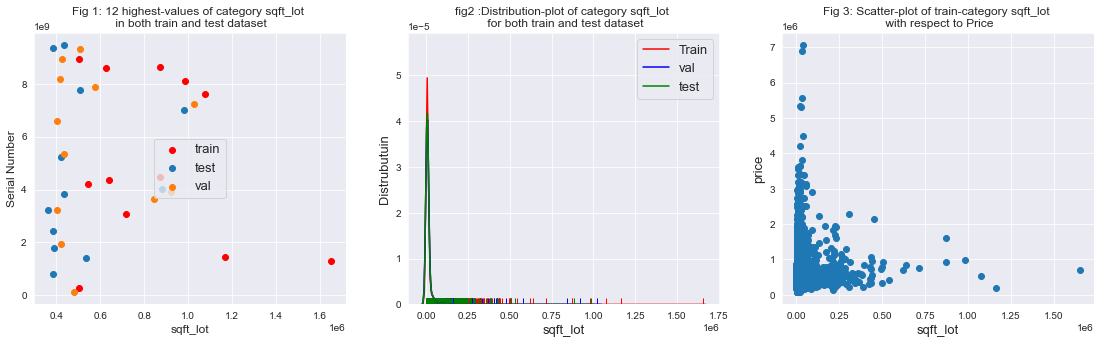

In [13]:
print('Before outlier-removal of sqdt_lot: ')
outlier_check_plot('sqft_lot')

Before outlier-removal of BsmtFinSF1: 


c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users

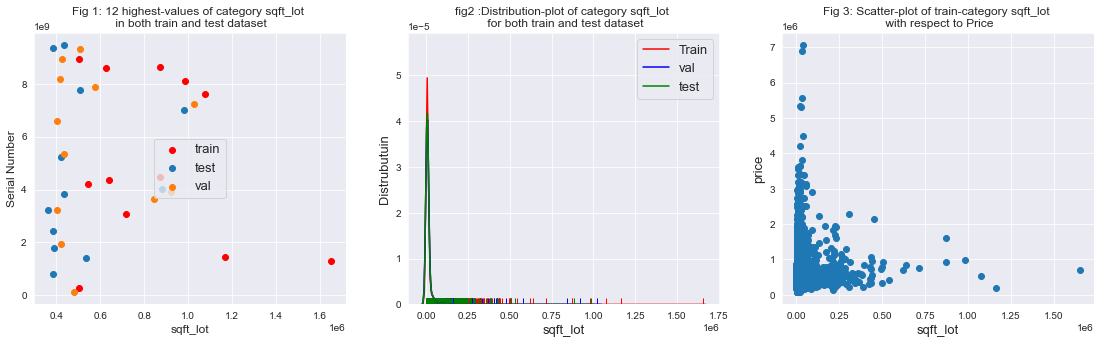

In [14]:

print('Before outlier-removal of BsmtFinSF1: ')
outlier_check_plot('sqft_lot')

In [15]:
'''

train = train.drop(train[(train['BsmtFinSF1']>2000) & (train['SalePrice']<500000)].index)
print('After outlier-removal of BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')
'''

"\n\ntrain = train.drop(train[(train['BsmtFinSF1']>2000) & (train['SalePrice']<300000)].index)\nprint('After outlier-removal of BsmtFinSF1: ')\noutlier_check_plot('BsmtFinSF1')\n"

In [16]:
'I am not doing the data removal parts'

'I am not doing the data removal parts'

Step 5: Normalizing Label-Column
Now SalePrice is the variable we need to predict. We need to check-out whether the SalePrice-values are normally distributed or not. In the distribution-plot mu is average distribution(Black) and sigma is the difference in between the middle-point and inflection-point

In [17]:
# MAKING A COPY OF TRAIN & TEST DB
trainNoOutlier = train.copy()
testNoOutlier = test.copy()

# A FUNCTION TO CHECK ACTUAL AND NORMALIZED DISTRIBUTION-PLOT OF SALEPRICE
def check_distribution(column):
    
    #DISTRIBUTION-PLOT
    plt.subplots(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(train[column] , fit=norm)
    (mu, sigma) = norm.fit(train[column])
    plt.legend(['mu= {:.2f} & sigma= {:.2f} in normal-dist'.format(mu, sigma)], loc='best', fontsize=13)
    plt.ylabel('Frequency')
    plt.title('distribution')
    
    # QUANTILE-QUANTILE PLOT
    plt.subplot(1, 2, 2)                                                                                
    res = stats.probplot(train[column], plot=plt)
    plt.show()

Distribution of SalePrice before normalization:


c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


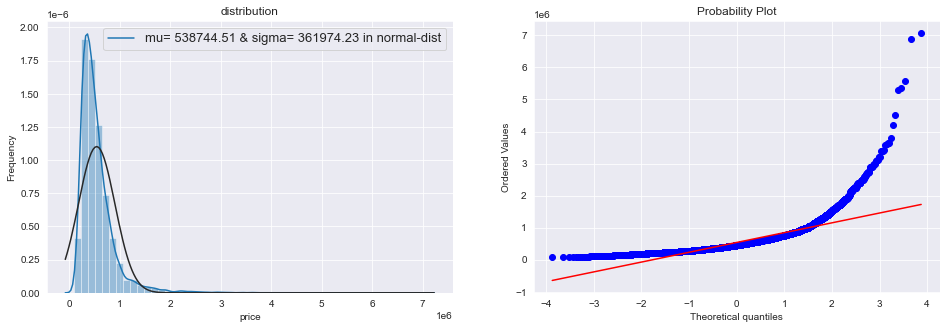

In [18]:

print('Distribution of SalePrice before normalization:')
check_distribution('price')

Distribution of SalePrice after normalization:


c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


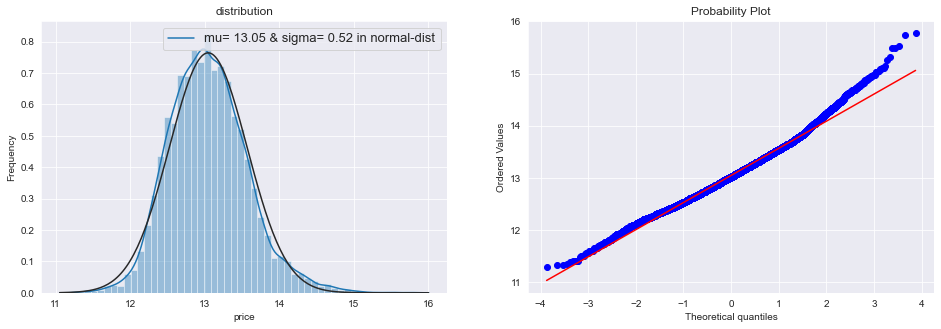

In [19]:
train["price"] = np.log1p(train["price"]) 
print('Distribution of SalePrice after normalization:')
check_distribution('price')

In [20]:
train.shape, val.shape
#train.price.values

((12968, 19), (4323, 19))

In [21]:
#all_data_testing = pd.concat((train, val)).reset_index(drop=True)
#all_data_testing  # 12968 + 4323 = 


The skew seems now corrected and the data appears to be more normally distributed

# Step 6: Concatenating Train and Test Datasets:

In [22]:
# SAVING TRAINING AND TEST DATA LENGTH
zero = 0
ntrain = train.shape[zero]  # nunmber of training sample/data
ntest = test.shape[zero]    # nunmber of training sample/data

# STORING TRAIN-DATA LABELS SEPARATELY
y_train = train.price.values    # swperating all the price value as y_train

# CONCATENATING TRAIN AND TEST DATAFRAME
#all_data = pd.concat((train, test)).reset_index(drop=True)
all_data = pd.concat((train, val)).reset_index(drop=True)  #129680 + 4323 = 17283 (adding all train and validation data)

# REMOVING TRAIN-DATA LABELS
all_data.drop(['price'], axis=1, inplace=True)  # removing price data from all data

# CHECKING SIZE OF CONCATENATED DATAFRAME
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17291, 18)


In [23]:
y_train.shape

(12968,)

In [24]:
# no missing data
missing_value_counts = all_data.isnull().sum()
missing_value_counts

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Step 7: Dealing with missing Values

In [25]:
'''
# MAKING A SERIES CONTAINING PERCENTAGE OF MISSING VALUES FOR EACH COLUMN
missing_value_counts = all_data.isnull().sum()
all_data_na = missing_value_counts / len(all_data)

#DROPPING FEATURES WITH NO MISSING-VALUES
all_data_na = all_data_na.drop(all_data_na[all_data_na == zero].index)
all_data_na = all_data_na.sort_values(ascending=False)

# MAKING A DATAFRAME WITH THAT SERIES
missing_data = pd.DataFrame({'Missing Data Ratio' :all_data_na})

# CHECKING THE SIZE OF THE DATAFRAME
print('Total number of Features with missing data = '+str(len(missing_data))+'\n')
'''

"\n# MAKING A SERIES CONTAINING PERCENTAGE OF MISSING VALUES FOR EACH COLUMN\nmissing_value_counts = all_data.isnull().sum()\nall_data_na = missing_value_counts / len(all_data)\n\n#DROPPING FEATURES WITH NO MISSING-VALUES\nall_data_na = all_data_na.drop(all_data_na[all_data_na == zero].index)\nall_data_na = all_data_na.sort_values(ascending=False)\n\n# MAKING A DATAFRAME WITH THAT SERIES\nmissing_data = pd.DataFrame({'Missing Data Ratio' :all_data_na})\n\n# CHECKING THE SIZE OF THE DATAFRAME\nprint('Total number of Features with missing data = '+str(len(missing_data))+'\n')\n"

In [26]:
'''
#PLOTTING RATIO OF MISSING VALUES FOR EACH COLUMN
plt.subplots(figsize=(19, 4))
plt.xticks(rotation=ninety)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('All Columns with missing data')
plt.show()
'''

"\n#PLOTTING RATIO OF MISSING VALUES FOR EACH COLUMN\nplt.subplots(figsize=(19, 4))\nplt.xticks(rotation=ninety)\nsns.barplot(x=all_data_na.index, y=all_data_na)\nplt.xlabel('Features')\nplt.ylabel('Percentage of missing values')\nplt.title('All Columns with missing data')\nplt.show()\n"

Now we have separated the missing-value columns into 2 categories: Low Percentage Missing Value Columns:LPMVC that are the last 18 columns of above plot. The rests are considered as High Percentage Missing Value Columns:HPMVC

In [27]:
# low percententage of missing data
'''
# VISUALIZING LOW PERCENTAGE MISSING VALUE COLUMNS: LPMVC
LPMVC=all_data_na.drop(all_data_na.index[:18])
plt.subplots(figsize=(19, 4))
plt.xticks(rotation=ninety)
sns.barplot(x=LPMVC.index, y=LPMVC)
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('All Columns with very less percentage of missing data')
plt.show()
'''

"\n# VISUALIZING LOW PERCENTAGE MISSING VALUE COLUMNS: LPMVC\nLPMVC=all_data_na.drop(all_data_na.index[:18])\nplt.subplots(figsize=(19, 4))\nplt.xticks(rotation=ninety)\nsns.barplot(x=LPMVC.index, y=LPMVC)\nplt.xlabel('Features')\nplt.ylabel('Percentage of missing values')\nplt.title('All Columns with very less percentage of missing data')\nplt.show()\n"

In [28]:
# distinguishing numeric and non-numeric data
'''
# LETS DISTINGUISH NUMERIC AND NON-NUMERIC COLUMNS IN LPMVC
numeric_LPMVC = LPMVC
non_numeric_LPMVC = LPMVC
for item in range(len(LPMVC)):
    if(train[LPMVC.index[item]].dtype == object):
        numeric_LPMVC = numeric_LPMVC.drop(LPMVC.index[item])
    else:
        non_numeric_LPMVC = non_numeric_LPMVC.drop(LPMVC.index[item])
        
# MAKING A DATAFRAME WITH THAT SERIES
numeric_colums_with_low_percentage_of_missing_data = pd.DataFrame({'missing-ratio of numeric LPMVC' :numeric_LPMVC})
numeric_colums_with_low_percentage_of_missing_data
'''

"\n# LETS DISTINGUISH NUMERIC AND NON-NUMERIC COLUMNS IN LPMVC\nnumeric_LPMVC = LPMVC\nnon_numeric_LPMVC = LPMVC\nfor item in range(len(LPMVC)):\n    if(train[LPMVC.index[item]].dtype == object):\n        numeric_LPMVC = numeric_LPMVC.drop(LPMVC.index[item])\n    else:\n        non_numeric_LPMVC = non_numeric_LPMVC.drop(LPMVC.index[item])\n        \n# MAKING A DATAFRAME WITH THAT SERIES\nnumeric_colums_with_low_percentage_of_missing_data = pd.DataFrame({'missing-ratio of numeric LPMVC' :numeric_LPMVC})\nnumeric_colums_with_low_percentage_of_missing_data\n"

In [29]:
# filling values with zero
'''

for item in range(len(numeric_LPMVC)):
    all_data[numeric_LPMVC.index[item]] = all_data[numeric_LPMVC.index[item]].fillna(zero)
'''

'\n\nfor item in range(len(numeric_LPMVC)):\n    all_data[numeric_LPMVC.index[item]] = all_data[numeric_LPMVC.index[item]].fillna(zero)\n'

In [30]:
#missing data processing

# feature engineering

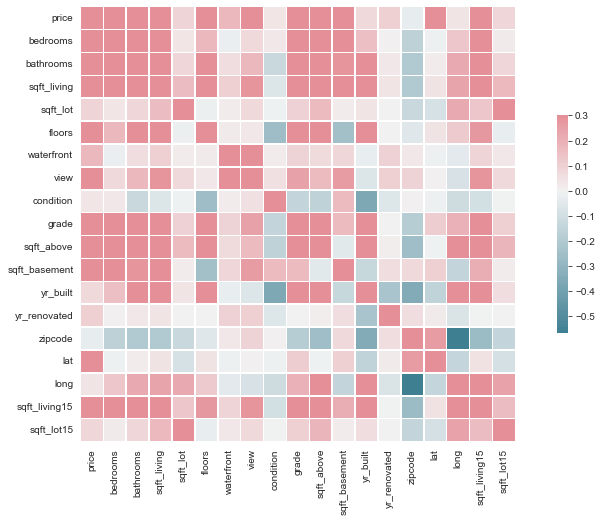

In [31]:
# plottng polynomaial features from most correlated to price

corrmat = train.corr()
plt.subplots(figsize=(15,8))
# generating colormap
cmap = sns.diverging_palette(219, 9, as_cmap=True)

# drawing the heatmap with mask and correect aspect
sns.heatmap(corrmat, cmap=cmap, vmax=0.3, center=0, 
           square=True, linewidths=0.5, cbar_kws={'shrink': .5}) #annot=True/False
plt.show()

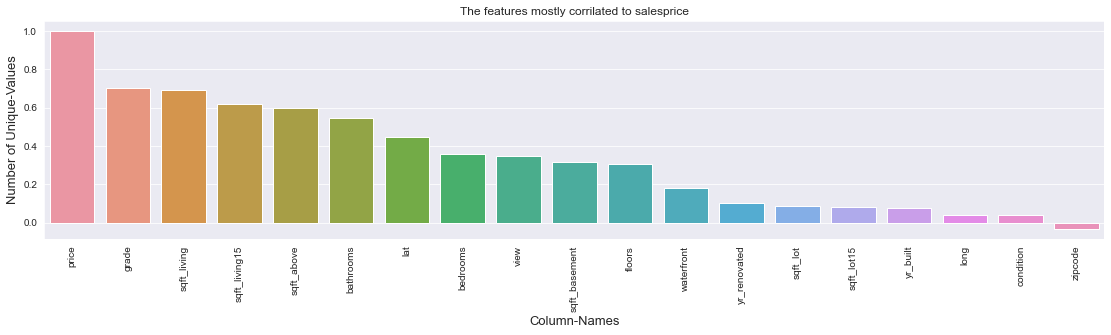

In [32]:
# THE FEATURES MOSTLY CORRELATED TO SALESPRICE
cols = train.dtypes[train.dtypes != 'object'].index
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['price'])))
    
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)
#ist.head()
plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('The features mostly corrilated to salesprice')
plt.show()

In [33]:
# recreating test and validation
all_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,2.50,2290,6302,2.0,0,0,3,9,2290,0,1997,0,98058,47.4350,-122.107,2700,7500
1,5,3.25,4260,7861,2.0,0,0,3,10,4260,0,2005,0,98074,47.6110,-121.992,4020,7528
2,3,1.75,2000,7111,1.0,0,0,4,7,1360,640,1956,0,98177,47.7676,-122.373,1830,9000
3,3,1.75,1270,4800,1.0,0,0,3,7,1270,0,1952,2014,98126,47.5362,-122.376,1220,4800
4,3,1.75,2100,8298,1.0,0,0,4,7,1230,870,1952,0,98166,47.4601,-122.360,1700,10830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17286,3,2.00,1400,7384,1.0,0,0,3,7,1150,250,1979,0,98058,47.4655,-122.174,1820,7992
17287,3,2.25,1920,9672,2.0,0,0,4,8,1920,0,1984,0,98074,47.6233,-122.046,1950,10125
17288,3,1.50,1490,8475,1.0,0,0,4,7,1490,0,1963,0,98052,47.6571,-122.133,1490,8540
17289,4,1.50,1350,8113,1.0,0,0,4,7,1350,0,1959,0,98004,47.5807,-122.196,1930,8113


In [34]:
all_data.shape,test.shape

((17291, 18), (4322, 19))

In [35]:
test.drop(['price'], axis=1, inplace=True)

In [36]:
all_data.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

In [37]:
train = all_data[:ntrain]
valid = all_data[ntrain:]

#making copy
trainCopyMod = train.copy()
validCopyMod = valid.copy()
testCopyMod = test

train.shape, valid.shape, y_train.shape, test.shape

((12968, 18), (4323, 18), (12968,), (4322, 18))

In [38]:
# regression model implementataion
#import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(train, y_train)
# sort feature importnaces
#indices = np.argsirt(model.feature_importance_)[::-1]
#indices = indices[:]

'''
# VISUALIZATION
plt.subplots(figsize=(18, 12))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices])
g.set_xlabel("Relative importance",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Features sorted by importance")
plt.show()
'''


'\n# VISUALIZATION\nplt.subplots(figsize=(18, 12))\ng = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices])\ng.set_xlabel("Relative importance",fontsize=12)\ng.tick_params(labelsize=9)\ng.set_title("Features sorted by importance")\nplt.show()\n'

In [39]:
xgb_train = train.copy()
xgb_valid = valid.copy()
xgb_test = test.copy()

model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)
#model2 = xgb.XGBRegressor()
#model2.fit(xgb_test, y=None)

# SELECTING THE MOST IMPORTANT FEATURES
xgb_feat_red = SelectFromModel(model, prefit = True)
#xgb_feat_red2 = SelectFromModel(model2, prefit = True)

# REDUCING ESTIMATION VALIDATION AND TEST DATASETS
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_valid = xgb_feat_red.transform(xgb_valid)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_valid.shape)

Results of 'feature_importances_':
X_train:  (12968, 5) 
X_test:  (4323, 5)


c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [40]:
xgb_test.shape

(4322, 5)

In [41]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=.3, random_state=42)
dataset=['X_train', 'X_test','Y_train', 'Y_test']
shape=[X_train.shape, X_test.shape, Y_train.shape, Y_test.shape]
datasets = pd.DataFrame(
    {'DataSet': dataset,
     'shape': shape
    })
datasets

,DataSet,shape
0,X_train,"(9077, 5)"
1,X_test,"(3891, 5)"
2,Y_train,"(9077,)"
3,Y_test,"(3891,)"


In [42]:
# training

# ALGORITHM SELECTION AND INITIALIZATION
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), 
          BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

# RANDOMISING THE CROSS VALIDATION SAMPLES
shuff = ShuffleSplit(n_splits = 5, test_size =.2, random_state=42)

# CREATING TABLE TO COMPARE MODEL ACCURACY
columns = ['Name', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

# INDEXING THROUGH MODELS AND SAVING PERFORMANCE TO TABLE
row_index = zero
percent = 100 
for alg in models:

    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    alg.fit(X_train, Y_train)
    
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt((np.square((Y_test-alg.predict(X_test)))).mean())
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = np.multiply(training_results, percent)
    before_model_compare.loc[row_index, 'Test Accuracy'] = np.multiply(test_results, percent)
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained!')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 KernelRidge trained!
2 ElasticNet trained!
3 Lasso trained!
4 GradientBoostingRegressor trained!
5 BayesianRidge trained!
6 LassoLarsIC trained!


c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Stand

7 RandomForestRegressor trained!
8 XGBRegressor trained!


,Name,Train Accuracy Mean,Test Accuracy
0,KernelRidge,31.612,32.246
1,ElasticNet,37.497,37.560
2,Lasso,37.497,37.561
3,GradientBoostingRegressor,21.594,21.770
4,BayesianRidge,26.901,27.224
5,LassoLarsIC,26.901,27.223
6,RandomForestRegressor,23.296,23.131
7,XGBRegressor,22.516,21.869


In [43]:
#model = Lasso()
#model = ElasticNet()
model = RandomForestRegressor()
model.fit(xgb_train, y_train)
pred = model.predict(xgb_test)

In [44]:
meta_model_pred = np.expm1(model.predict(xgb_test))

In [45]:
test2 = pd.read_csv('price_data_ts.csv')
res_col = ['id', 'price']
res_df = pd.DataFrame(test2, columns=res_col)

In [46]:
res_df['id'], res_df['price'] = test2['id'], meta_model_pred

In [47]:
res_df['id']= res_df['id'].astype(str).str.zfill(10)

In [48]:
res_df['price']= res_df['price'].round()

In [49]:
res_df['id'] = res_df['id'].astype(str)+test2['date'].astype(str)

In [50]:
res_df.to_csv('resultEsnet.csv', index=False)

In [51]:
res_df

,id,price
0,700010085020140926T000000,510009.0
1,403740028020140923T000000,445356.0
2,142340016020140618T000000,209942.0
3,776740006020141119T000000,516232.0
4,946590050020140617T000000,589640.0
...,...,...
4317,733822037020141006T000000,324126.0
4318,681910015020140721T000000,632239.0
4319,082405914020140527T000000,686735.0
4320,051450009020140513T000000,557562.0


In [52]:
type(xgb_test), type(xgb_train)
#xgb_train.shape

(numpy.ndarray, numpy.ndarray)

In [56]:
#applying grid search

# MAKING A LIST OF MODELS
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), 
          RandomForestRegressor(), xgb.XGBRegressor()]

# SETTING PARAMETER-VALUES FOR EACH MODEL
KR_param_grid = {'alpha': [0.1, 0.6], 'coef0': [100, 2.5], 'degree': [1, 2], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [1e-3, 0.0005], 'copy_X': [True], 'l1_ratio': [0.6, 0.9], 'fit_intercept': [True], 
                 'normalize': [False],'precompute': [False], 'max_iter': [300], 'tol': [1e-3], 'selection': ['random'],
                 'random_state': [None]}
LASS_param_grid = {'alpha': [5e-4, 0.0001], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 
                   'precompute': [False],'max_iter': [300], 'tol': [1e-2], 'selection': ['random'], 
                   'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1, 0.05], 'n_estimators': [300], 'max_depth': [3, 4], 
                                        'min_samples_split': [2.5e-3], 'min_samples_leaf': [5, 15]}
BR_param_grid = {'n_iter': [200], 'tol': [1e-5, 1e-6], 'alpha_1': [1e-8, 1e-6], 'alpha_2': [5e-6, 5e-4], 
                 'lambda_1': [5e-6, 5e-4],'lambda_2': [1e-8, 1e-6], 'copy_X': [True]}
LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [100], 'copy_X': [True], 'precompute': ['auto'], 
                 'eps': [1e-6]}
RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5], 
                  'min_samples_leaf': [2]}
XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1, 0.05], 'n_estimators': [300], 'booster': ['gbtree'], 
                  'gamma': [zero, 0.0468], 'reg_alpha': [0.1, 0.4640], 'reg_lambda': [0.7, 0.8571], 
                  'max_delta_step': [zero], 'min_child_weight': [1, 1.7817], 'colsample_bytree': [.5, 0.4603],
                  'colsample_bylevel': [0.2], 'scale_pos_weight': [1]}

# MAKING A LIST OF PARAMETER-GRIDS
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, 
               RFR_param_grid, XGB_param_grid]

In [ ]:

# applying stacking
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), 
          RandomForestRegressor(), xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'Lasso Lars IC', 
         'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, 
               RFR_param_grid, XGB_param_grid]
stacked_validation_train = pd.DataFrame()
stacked_test_train = pd.DataFrame()
row_index=zero
for alg in models:
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(zero)
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    stacked_validation_train.insert(loc = row_index, column = names[zero], value = gs_best.predict(X_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking validation dataset!')
    
    stacked_test_train.insert(loc = row_index, column = names[zero], value = gs_best.predict(xgb_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking test dataset!')
    names.pop(zero)
    row_index+=1
print('Done')


# model ensemble

In [55]:
import csv
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid